# Building an Image Classifier Using the Sequential API

---

Gabriel Miranda Oliva

Rafael Takeguma Goto

## Fazendo o download do dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atulanandjha/lfwpeople")

print("Path to dataset files:", path)

100%|██████████| 232M/232M [00:04<00:00, 49.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3


## Verificando o que tem dentro da pasta de caminho armazenado na variável path

In [ ]:
import os

print(os.listdir(path))

['pairs.txt', 'pairsDevTrain.txt', 'pairsDevTest.txt', 'lfw-funneled.tgz']


## Descompactando o arquivo 'lfw-funneled.tgz'

In [ ]:
import tarfile

# pegando o caminho do arquivo que ta na pasta especificada em path
arquivo = os.path.join(path, 'lfw-funneled.tgz')

# Abre e extrai o conteúdo
with tarfile.open(arquivo, 'r:gz') as tar:
  tar.extractall(path=path)

print("Extração deu certo")

Extração deu certo


## Vendo o que tem dentro da pasta descompactada

In [ ]:
path_pasta_descompactada = os.path.join(path, 'lfw_funneled')

print(os.listdir(path_pasta_descompactada))

['Jose_Rosado', 'Bruce_Arena', 'Larry_Thompson', 'Jose_Carlo_Fernandez', 'Grace_Dodd', 'Francisco_Garcia', 'Ivan_Lee', 'Annie-Jeanne_Reynaud', 'Zahir_Shah', 'Carly_Fiorina', 'Santiago_Botero', 'Erika_Reyes', 'Kim_Clijsters', 'Lonnie_Donegan', 'Antony_Leung', 'Anette_Hosoi', 'Tomas_Malik', 'Demetrius_Ferraciu', 'Thomas_Scavone', 'Ludivine_Sagnier', 'Nancy_Demme', 'Peter_Bacanovic', 'Carroll_Weimer', 'Albert_Costa', 'Perry_Gibbs', 'John_Nimmo', 'Carolyn_Dawn_Johnson', 'Takashi_Sorimachi', 'Ian_Smith', 'Frank_Hsieh', 'Sybille_Schmid', 'John_Howard', 'James_Brosnahan', 'Eric_Lindros', 'Emily_Mortimer', 'Julius_Barnes', 'Xavier_Malisse', 'Moon-So-ri', 'Dennis_Kucinich', 'Rosie_Perez', 'Woodrow_Stanley', 'Ricky_Quick', 'Bill_Mauldin', 'Kenneth_Dam', 'Mike_Montgomery', 'Sandra_Milo', 'Thomas_Wyman', 'Meirion_Evans', 'Francis_George', 'Chris_Kolanas', 'Omar_el-Heib', 'Kit_Bond', 'Marisol_Breton', 'Gong_Li', 'David_Trimble', 'Spike_Helmick', 'Jamie_Olis', 'Brendan_Gaughan', 'Mario_Lobo_Zagallo'

## Vendo o que tem dentro da pasta 'Sandra_Bullock'

In [ ]:
path_sandra_bullock = os.path.join(path_pasta_descompactada, 'Sandra_Bullock')

print(os.listdir(path_sandra_bullock))

['Sandra_Bullock_0004.jpg', 'Sandra_Bullock_0002.jpg', 'Sandra_Bullock_0001.jpg', 'Sandra_Bullock_0003.jpg']


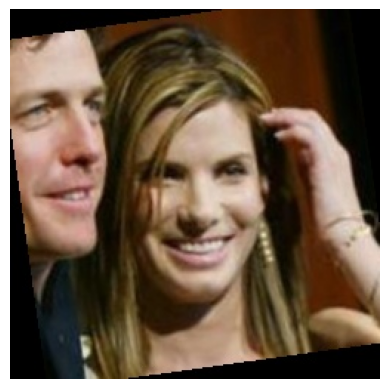

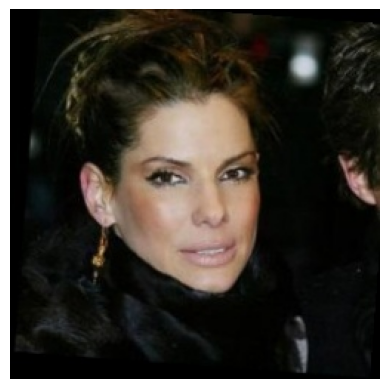

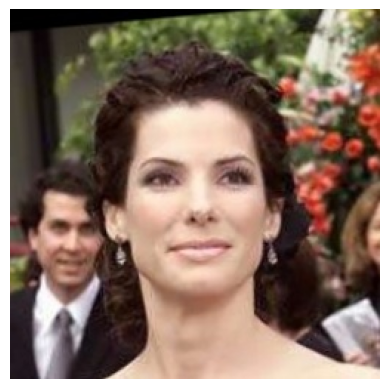

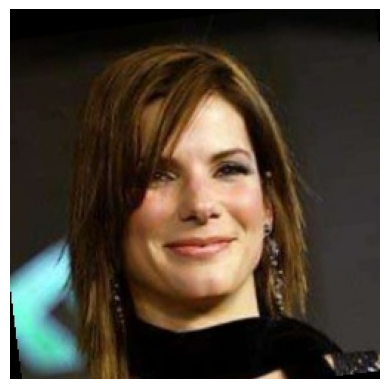

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for sandra in os.listdir(path_sandra_bullock):
  # pegando o caminho da imagem
  path_sandra_img = os.path.join(path_sandra_bullock, sandra)

  # lendo a imagem a partir de seu caminho
  sandra_img = mpimg.imread(path_sandra_img)

  plt.imshow(sandra_img)
  plt.axis('off')
  plt.show()

## Vendo o que tem no arquivo 'pairs.txt'

In [ ]:
with open(os.path.join(path, 'pairs.txt'), 'r') as file:
  linhas = file.readlines()
  print(''.join(linhas[:10]))

10	300
Abel_Pacheco	1	4
Akhmed_Zakayev	1	3
Akhmed_Zakayev	2	3
Amber_Tamblyn	1	2
Anders_Fogh_Rasmussen	1	3
Anders_Fogh_Rasmussen	1	4
Angela_Bassett	1	5
Angela_Bassett	2	5
Angela_Bassett	3	4



## Vendo o que tem na pasta 'pairsDevTrain.txt'


In [ ]:
with open(os.path.join(path, 'pairsDevTrain.txt'), 'r') as file:
  linhas = file.readlines()
  print(''.join(linhas[:10]))

1100
Aaron_Peirsol	1	2
Aaron_Peirsol	3	4
Aaron_Sorkin	1	2
Abdel_Nasser_Assidi	1	2
Abdullah	1	3
Abdullah	2	4
Abdullah_al-Attiyah	1	3
Abdullah_al-Attiyah	2	3
Abel_Pacheco	1	4



## Vendo o que tem na pasta 'pairsDevTest.txt'

In [ ]:
with open(os.path.join(path, 'pairsDevTest.txt'), 'r') as file:
  linhas = file.readlines()
  print(''.join(linhas[:10]))

500
Abdullah_Gul	13	14
Abdullah_Gul	13	16
Abdullatif_Sener	1	2
Adel_Al-Jubeir	1	3
Al_Pacino	1	2
Alan_Greenspan	1	5
Albert_Costa	2	6
Albert_Costa	4	6
Albert_Costa	5	6



## Carregando os caminhos dos pares de treinamento e teste

In [ ]:
# Funcao pra pegar o caminho dos pares nos arquivos txt
def load_pairs(path_pairs, path_data):
    with open(path_pairs, 'r') as file:
        lines = file.readlines()

    header = lines[0].strip()
    pairs = []

    for line in lines[1:]:
        # cria uma lista com o nome de uma ou mais pessoas e suas imagens
        parts = line.strip().split()


        if len(parts) == 3: # caso tenhamos duas imagens de uma mesma pessoa na linha
            name, img1, img2 = parts

            # pegando o caminho das imagens
            path_img1 = os.path.join(path_data, f"{name}/{name}_{int(img1):04d}.jpg")
            path_img2 = os.path.join(path_data, f"{name}/{name}_{int(img2):04d}.jpg")
        elif len(parts) == 4: # caso tenhamos imagens de duas pessoas na linha
            name1, img1, name2, img2 = parts

            path_img1 = os.path.join(path_data, f"{name1}/{name1}_{int(img1):04d}.jpg")
            path_img2 = os.path.join(path_data, f"{name2}/{name2}_{int(img2):04d}.jpg")
        else:
            continue

        pair = (path_img1, path_img2)
        pairs.append(pair)
    return pairs

In [ ]:
train_pairs = load_pairs(f'{path}/pairsDevTrain.txt', f'{path}/lfw_funneled/')
test_pairs = load_pairs(f'{path}/pairsDevTest.txt', f'{path}/lfw_funneled/')

print(f"Number of pairs for training: {len(train_pairs)}")
print(f"Number of pairs for testing: {len(test_pairs)}")

Number of pairs for training: 2200
Number of pairs for testing: 1000


## Pré-processamento das imagens


In [ ]:
from PIL import Image
import numpy as np

def load_preprocess_image(img_path, target_size=(100,100)):
    img = Image.open(img_path).convert('L') # passa pra Luminance, que eh uma escala de cinza pra imagens
    img = img.resize(target_size) # resize pra 100 por 100
    img_array = np.array(img, dtype=np.float32) / 255.0 # normalizar pra ficar de 0 a 1

    return img_array

In [ ]:
teste = load_preprocess_image(train_pairs[0][0])
teste

array([[0.94509804, 0.94509804, 0.9490196 , ..., 0.9372549 , 0.9372549 ,
        0.9372549 ],
       [0.9490196 , 0.9490196 , 0.9490196 , ..., 0.9372549 , 0.9372549 ,
        0.9372549 ],
       [0.9490196 , 0.9490196 , 0.9490196 , ..., 0.9411765 , 0.9411765 ,
        0.9372549 ],
       ...,
       [0.14901961, 0.19607843, 0.4627451 , ..., 0.23529412, 0.23137255,
        0.23137255],
       [0.15294118, 0.21568628, 0.49019608, ..., 0.24313726, 0.23529412,
        0.23137255],
       [0.15686275, 0.21176471, 0.53333336, ..., 0.23921569, 0.23137255,
        0.23137255]], dtype=float32)

## Preparando o dataset

In [ ]:
# func para transformar uma lista de pares de caminhos em arrays numpy pra treinar o modelo
def create_dataset(pairs, target_size=(100,100)):
    images1, images2, labels = [], [], []

    for img1_path, img2_path in pairs:
        # Pre-processa as imagens
        img1 = load_preprocess_image(img1_path, target_size)
        img2 = load_preprocess_image(img2_path, target_size)

        # Add as imagens nas listas respectivas
        images1.append(img1)
        images2.append(img2)

        # Par igual label = 1 else = 0
        if (os.path.dirname(img1_path) == os.path.dirname(img2_path)):
            label = 1
        else:
            label = 0

        # Add label na lista de labels
        labels.append(label)

    # Cria arrays numpy para armazenar as imagens e os labels
    X1 = np.array(images1)
    X2 = np.array(images2)
    y = np.array(labels)
    return X1, X2, y

In [ ]:
X1, X2, y = create_dataset(train_pairs)
print("dataset de treino pronto")
X1_test, X2_test, y_test = create_dataset(test_pairs)
print("dataset de teste pronto")

dataset de treino pronto
dataset de teste pronto


In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_valid, X2_train, X2_valid, y_train, y_valid = train_test_split(
    X1, X2, y, test_size=0.2, random_state=42
)

# Importando o tensorflow e o keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

## Criando o modelo
1. Camada pra passar tudo pra matrizes unidimensionais
2. Camada oculta com 300 neurônios
3. Camada oculta com 100 neurônios
4. Camada de saída com 5670 neurônios - um para cada pessoa do dataset

In [ ]:
def criar_modelo():
  return keras.models.Sequential([
    keras.layers.Flatten(input_shape=[100,100]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(5670, activation='softmax')
  ])

model = criar_modelo()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │       3,000,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5670)                │         572,670 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,603,070 (13.74 MB)

 Trainable params: 3,603,070 (13.74 MB)

 Non-trainable params: 0 (0.00 B)

## Compilando o modelo

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Treinando o modelo

In [ ]:
history = model.fit([X1_train,X2_train], y_train, epochs=50, validation_data=([X1_valid, X2_valid], y_valid))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 100, 100))', 'Tensor(shape=(32, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3958 - loss: 4.2888

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 100, 100))', 'Tensor(shape=(None, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.3972 - loss: 4.2524 - val_accuracy: 0.4841 - val_loss: 0.7613
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4967 - loss: 0.8695 - val_accuracy: 0.4841 - val_loss: 0.8389
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4744 - loss: 0.8183 - val_accuracy: 0.5159 - val_loss: 0.7807
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5009 - loss: 0.7548 - val_accuracy: 0.5273 - val_loss: 0.6994
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4765 - loss: 0.7748 - val_accuracy: 0.4909 - val_loss: 0.7185
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5015 - loss: 0.7324 - val_accuracy: 0.5159 - val_loss: 0.7552
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4744 - loss: 0.7653 - val_accuracy: 0.4841 - val_loss: 0.8130
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5115 - loss: 0.7364 - val_accuracy: 0.4841 - val_loss: 0.

## Verificando as curvas de aprendizado

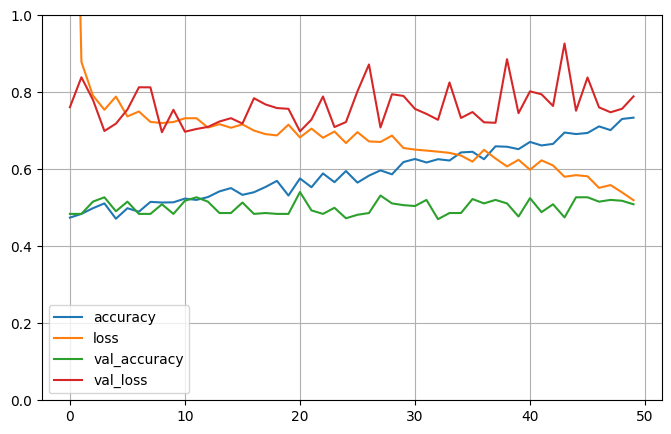

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Tentando treinar com mais épocas


In [ ]:
history2 = model.fit([X1_train, X2_train], y_train, epochs=30, validation_data=([X1_valid, X2_valid], y_valid))


Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7431 - loss: 0.5254 - val_accuracy: 0.4682 - val_loss: 0.8875
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7346 - loss: 0.5392 - val_accuracy: 0.5023 - val_loss: 0.7997
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7406 - loss: 0.4984 - val_accuracy: 0.5023 - val_loss: 0.7857
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7278 - loss: 0.5143 - val_accuracy: 0.4773 - val_loss: 1.0681
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7393 - loss: 0.5280 - val_accuracy: 0.5159 - val_loss: 1.2469
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6978 - loss: 0.6053 - val_accuracy: 0.5023 - val_loss: 0.8420
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7783 - loss: 0.4624 - val_accuracy: 0.5159 - val_loss: 0.8468
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7799 - loss: 0.4748 - val_accuracy: 0.5477 - v

### Acurácia em constante crescimento
Como pode-se observar no treinamento com mais épocas, a acurácia continua crescendo e a acurácia de validação permanece na faixa de 50%. Isso pode indicar um ajuste excessivo nos dados de treino (overfitting), e a generalização do modelo continua não muito boa

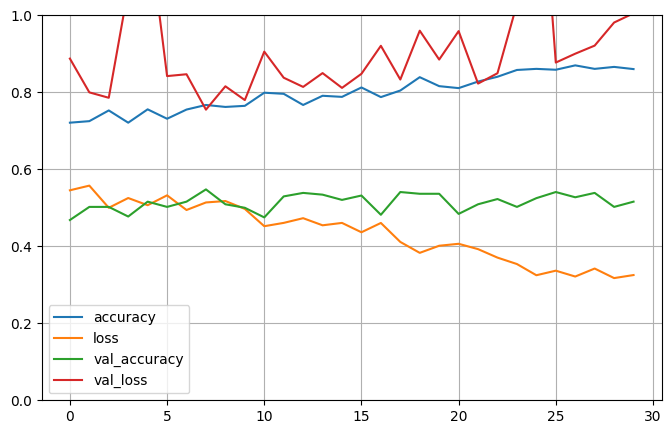

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Testando outro otimizador e treinando o novo modelo

In [ ]:
model2 = criar_modelo()

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit([X1_train,X2_train], y_train, epochs=50, validation_data=([X1_valid, X2_valid], y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=('Tensor(shape=(32, 100, 100))', 'Tensor(shape=(32, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4285 - loss: 2.1954

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=('Tensor(shape=(None, 100, 100))', 'Tensor(shape=(None, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4294 - loss: 2.1777 - val_accuracy: 0.5227 - val_loss: 0.6966
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5308 - loss: 0.7466 - val_accuracy: 0.5068 - val_loss: 0.7235
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5342 - loss: 0.7219 - val_accuracy: 0.4795 - val_loss: 0.8169
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5261 - loss: 0.8130 - val_accuracy: 0.4864 - val_loss: 0.7230
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5747 - loss: 0.6799 - val_accuracy: 0.5136 - val_loss: 0.7721
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5540 - loss: 0.6902 - val_accuracy: 0.5045 - val_loss: 0.7066
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5695 - loss: 0.6862 - val_accuracy: 0.4977 - val_loss: 0.7398
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5037 - loss: 0.7267 - val_accuracy: 0.5114 - val_loss: 0.

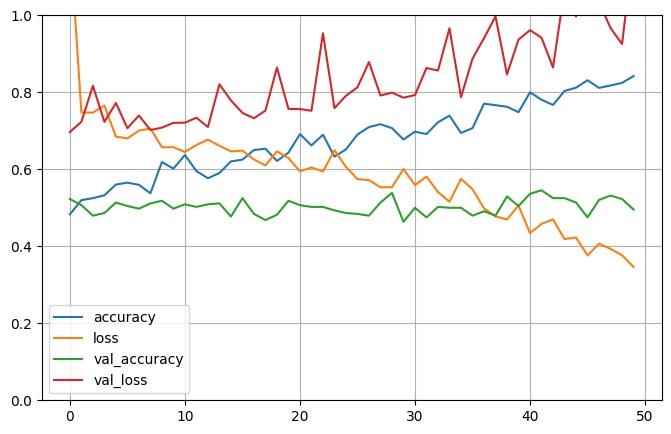

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Testando com mais épocas

In [ ]:
history2 = model.fit([X1_train,X2_train], y_train, epochs=30, validation_data=([X1_valid, X2_valid], y_valid))

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9090 - loss: 0.2635 - val_accuracy: 0.5136 - val_loss: 0.8790
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8889 - loss: 0.2868 - val_accuracy: 0.5045 - val_loss: 0.9894
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8783 - loss: 0.2966 - val_accuracy: 0.5636 - val_loss: 0.9694
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9123 - loss: 0.2424 - val_accuracy: 0.5273 - val_loss: 0.8747
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9257 - loss: 0.2306 - val_accuracy: 0.5250 - val_loss: 0.9474
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9234 - loss: 0.2165 - val_accuracy: 0.5182 - val_loss: 0.9425
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8975 - loss: 0.2589 - val_accuracy: 0.4977 - val_loss: 1.1638
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9038 - loss: 0.2251 - val_accuracy: 0.5000 - v

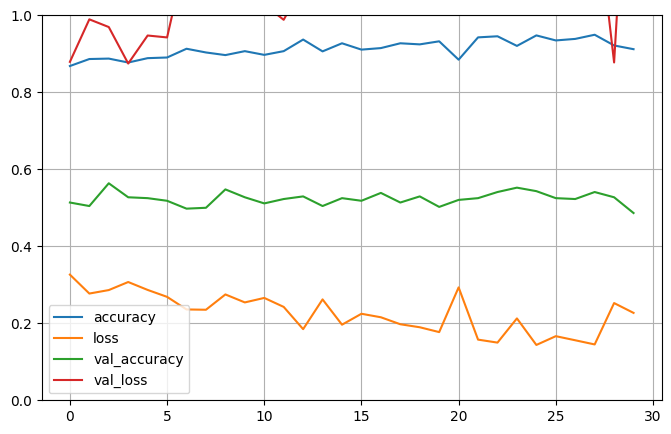

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Testando o treinamento com 80 épocas de uma vez só

In [ ]:
model3 = criar_modelo()
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model3.fit([X1_train,X2_train], y_train, epochs=80, validation_data=([X1_valid, X2_valid], y_valid))

pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_10
Received: inputs=('Tensor(shape=(32, 100, 100))', 'Tensor(shape=(32, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4609 - loss: 2.1132

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_10
Received: inputs=('Tensor(shape=(None, 100, 100))', 'Tensor(shape=(None, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4616 - loss: 2.0975 - val_accuracy: 0.4864 - val_loss: 0.8632
Epoch 2/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5133 - loss: 0.7882 - val_accuracy: 0.5136 - val_loss: 0.7467
Epoch 3/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.5330 - loss: 0.7231 - val_accuracy: 0.5159 - val_loss: 0.8061
Epoch 4/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5166 - loss: 0.7645 - val_accuracy: 0.5045 - val_loss: 0.7021
Epoch 5/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5490 - loss: 0.6940 - val_accuracy: 0.4795 - val_loss: 0.7540
Epoch 6/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5590 - loss: 0.6853 - val_accuracy: 0.5091 - val_loss: 0.7021
Epoch 7/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5868 - loss: 0.6797 - val_accuracy: 0.5091 - val_loss: 0.7024
Epoch 8/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6199 - loss: 0.6590 - val_accuracy: 0.5205 - val_loss: 0.

KeyboardInterrupt: 

## Testando mais camadas escondidas

O modelo não está aprendendo bem, como podemos ver, o val_loss fica em 1.0 próximo a 40 épocas e se mantém, o que pode significar um overfitting. Utilizar mais camadas pode solucionar esse problema. O dropout também pode ajudar a reduzir o overfitting.

In [ ]:
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[100, 100]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.3),  # Evita overfitting
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(5670, activation='softmax')
])

model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 300)                 │       3,000,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5670)                │       1,139,670 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,190,270 (15.98 MB)

 Trainable params: 4,190,270 (15.98 MB)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_15
Received: inputs=('Tensor(shape=(32, 100, 100))', 'Tensor(shape=(32, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4343 - loss: 2.4817

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_15
Received: inputs=('Tensor(shape=(None, 100, 100))', 'Tensor(shape=(None, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.4352 - loss: 2.4624 - val_accuracy: 0.4841 - val_loss: 0.8625
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5038 - loss: 0.8065 - val_accuracy: 0.5205 - val_loss: 0.6930
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.4945 - loss: 0.7559 - val_accuracy: 0.4841 - val_loss: 0.6957
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5049 - loss: 0.7166 - val_accuracy: 0.5250 - val_loss: 0.6977
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.4749 - loss: 0.7328 - val_accuracy: 0.5182 - val_loss: 0.7018
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5135 - loss: 0.7090 - val_accuracy: 0.5114 - val_loss: 0.6978
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5114 - loss: 0.7152 - val_accuracy: 0.5182 - val_loss: 0.6944
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5247 - loss: 0.7044 - val_accuracy: 0.5182 - val_loss: 0.

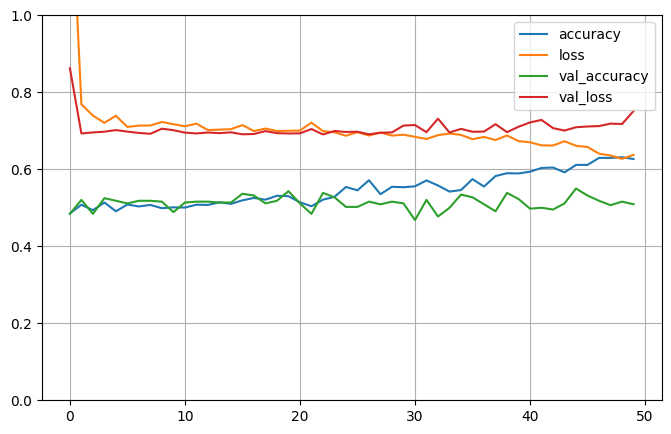

In [ ]:
history4 = model4.fit([X1_train,X2_train], y_train, epochs=50, validation_data=([X1_valid, X2_valid], y_valid))

pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Testando o modelo maior com outro otimizador

In [ ]:
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[100, 100]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.3),  # Evita overfitting
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(5670, activation='softmax')
])

model5.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_23
Received: inputs=('Tensor(shape=(32, 100, 100))', 'Tensor(shape=(32, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3979 - loss: 4.3870

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_23
Received: inputs=('Tensor(shape=(None, 100, 100))', 'Tensor(shape=(None, 100, 100))')
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.3994 - loss: 4.3506 - val_accuracy: 0.5159 - val_loss: 0.8294
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4940 - loss: 0.9529 - val_accuracy: 0.4841 - val_loss: 1.3315
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4979 - loss: 0.9110 - val_accuracy: 0.5159 - val_loss: 1.0943
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5165 - loss: 0.7963 - val_accuracy: 0.4841 - val_loss: 0.7256
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4969 - loss: 0.7633 - val_accuracy: 0.4841 - val_loss: 0.7319
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5133 - loss: 0.7481 - val_accuracy: 0.4841 - val_loss: 0.7083
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4892 - loss: 0.7341 - val_accuracy: 0.4841 - val_loss: 0.7055
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5135 - loss: 0.7401 - val_accuracy: 0.5159 - val_loss: 0.

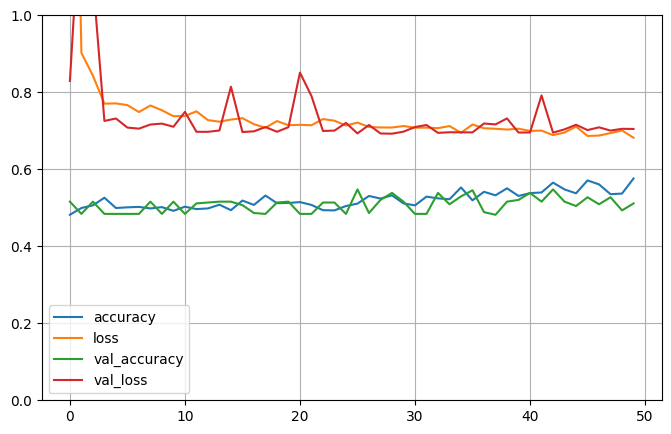

In [ ]:
history5 = model5.fit([X1_train,X2_train], y_train, epochs=50, validation_data=([X1_valid, X2_valid], y_valid))

pd.DataFrame(history5.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Comparando os dois modelos

In [ ]:
test_loss1, test_acc1 = model4.evaluate(([X1_valid, X2_valid]), y_valid)
test_loss2, test_acc2 = model5.evaluate(([X1_valid, X2_valid]), y_valid)

print(f"Modelo 1 - Loss: {test_loss1:.4f}, Accuracy: {test_acc1:.4f}")
print(f"Modelo 2 - Loss: {test_loss2:.4f}, Accuracy: {test_acc2:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5265 - loss: 0.7490
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5551 - loss: 0.6978
Modelo 1 - Loss: 0.7514, Accuracy: 0.5091
Modelo 2 - Loss: 0.7047, Accuracy: 0.5114


## Testando mais épocas

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6449 - loss: 0.6060 - val_accuracy: 0.5227 - val_loss: 0.7412
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6391 - loss: 0.6100 - val_accuracy: 0.5136 - val_loss: 0.7195
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6415 - loss: 0.6083 - val_accuracy: 0.4909 - val_loss: 0.7965
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5770 - loss: 0.6497 - val_accuracy: 0.5341 - val_loss: 0.7099
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6530 - loss: 0.6052 - val_accuracy: 0.5159 - val_loss: 0.7028
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6412 - loss: 0.6130 - val_accuracy: 0.5455 - val_loss: 0.7298
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6151 - loss: 0.6210 - val_accuracy: 0.5250 - val_loss: 0.7208
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6403 - loss: 0.6013 - val_accuracy: 0.5159 - v

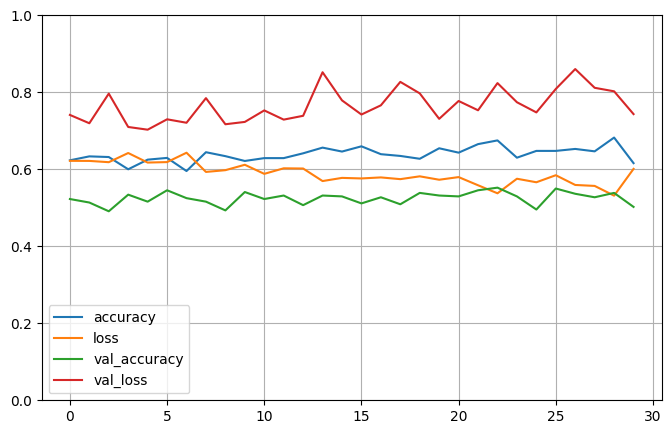

In [ ]:
history11 = model1.fit([X1_train,X2_train], y_train, epochs=30, validation_data=([X1_valid, X2_valid], y_valid))

pd.DataFrame(history11.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5634 - loss: 0.6932 - val_accuracy: 0.5159 - val_loss: 0.7665
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5781 - loss: 0.6785 - val_accuracy: 0.5295 - val_loss: 0.7073
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6151 - loss: 0.6675 - val_accuracy: 0.4818 - val_loss: 0.7412
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5664 - loss: 0.6880 - val_accuracy: 0.4773 - val_loss: 0.7542
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5922 - loss: 0.6721 - val_accuracy: 0.5182 - val_loss: 0.8231
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6060 - loss: 0.6711 - val_accuracy: 0.5000 - val_loss: 0.7249
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6050 - loss: 0.6535 - val_accuracy: 0.4932 - val_loss: 0.7399
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5924 - loss: 0.6754 - val_accuracy: 0.5273 - v

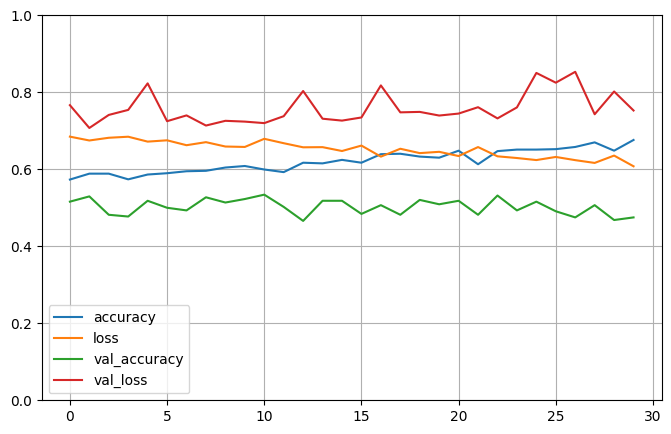

In [ ]:
history22 = model2.fit([X1_train,X2_train], y_train, epochs=30, validation_data=([X1_valid, X2_valid], y_valid))

pd.DataFrame(history22.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Comparando os modelos novamente

In [ ]:
test_loss1, test_acc1 = model1.evaluate(([X1_valid, X2_valid]), y_valid)
test_loss2, test_acc2 = model2.evaluate(([X1_valid, X2_valid]), y_valid)

print(f"Modelo 1 - Loss: {test_loss1:.4f}, Accuracy: {test_acc1:.4f}")
print(f"Modelo 2 - Loss: {test_loss2:.4f}, Accuracy: {test_acc2:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4937 - loss: 0.7352
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4793 - loss: 0.7454
Modelo 1 - Loss: 0.7433, Accuracy: 0.5023
Modelo 2 - Loss: 0.7527, Accuracy: 0.4750


## Utilizando os modelos para fazer predições

In [ ]:
X1_new = X1_test[:3]
X2_new = X2_test[:3]
y_proba_4 = model4.predict([X1_new, X2_new])
y_proba_4.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.5 , 0.5 , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.5 , 0.5 , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.42, 0.58, 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
y_proba_5 = model5.predict([X1_new, X2_new])
y_proba_5.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.51, 0.49, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.51, 0.49, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.45, 0.55, 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
y_test[:3]

array([1, 1, 1])

Como podemos ver ambos os modelos estão dividindo o nível de confiança entre as duas imagens do par, ou seja, ele acertou. Lembrando que o label 1 indica que o par de imagens é positivo, ou seja, ele se refere à mesma pessoa. Se o label for zero, indica que temos uma instância, onde uma imagem é de uma pessoa e a outra é de outra

## Checando as imagens

In [ ]:
def show_image(image):
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

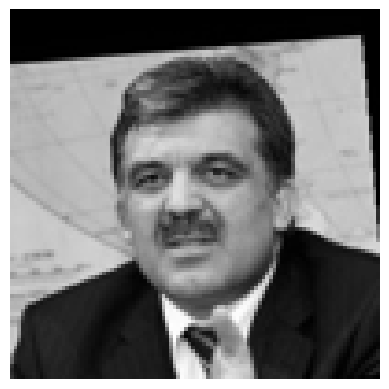

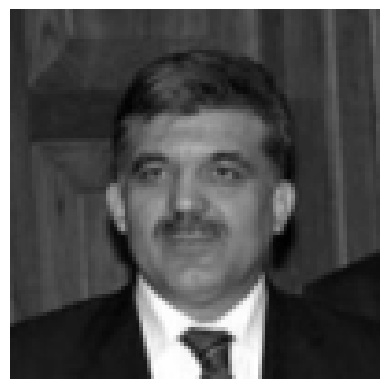

In [ ]:
show_image(X1_test[0])
show_image(X2_test[0])

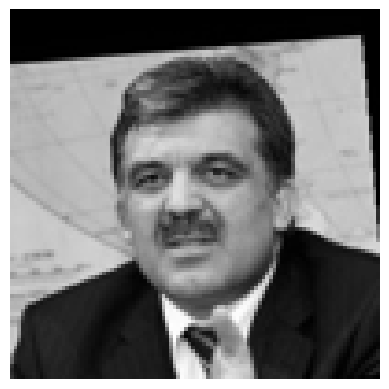

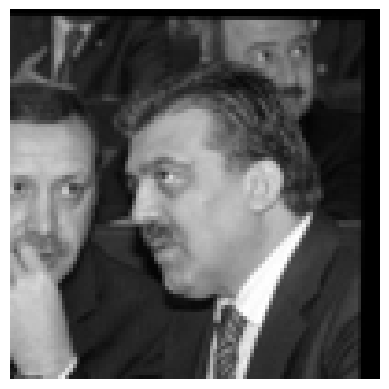

In [ ]:
show_image(X1_test[1])
show_image(X2_test[1])

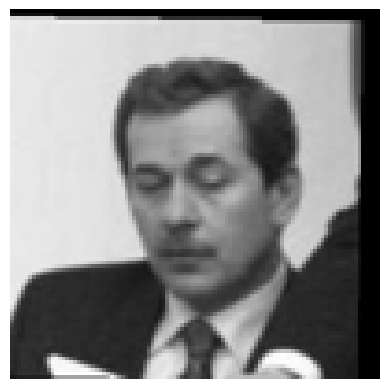

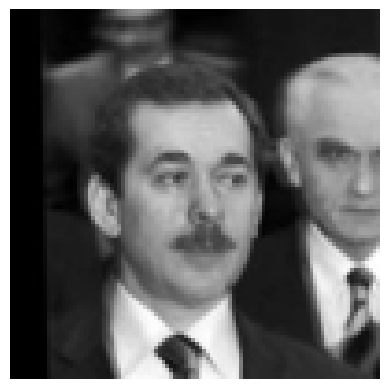

In [ ]:
show_image(X1_test[2])
show_image(X2_test[2])